In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
meta = pd.read_csv('movie_metadata.csv')
meta.drop_duplicates(inplace = True)


imdb = pd.read_csv('imdb.csv', escapechar = '\\')
imdb['year'] = pd.to_numeric(imdb['year'], errors = 'coerce')



In [316]:
b= pd.melt(imdb[['title','imdbRating','Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western']],id_vars=['title','imdbRating'], 
        var_name="Genre", 
        value_name="Count")
genres_rating = pd.DataFrame(b[b['Count'] == 1].groupby('Genre').mean()['imdbRating'].sort_values()).reset_index()

In [317]:
b= pd.melt(imdb[['title','imdbRating','nrOfWins','nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews','Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western']],id_vars=['title','imdbRating','nrOfWins','nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews'], 
        var_name="Genre", 
        value_name="Count")
b = b[b['Count'] == 1]
genres_data = pd.concat([pd.DataFrame(b.groupby('Genre')['title'].count()),
                         pd.DataFrame(b.groupby('Genre')['imdbRating'].mean()),
                         pd.DataFrame(b.groupby('Genre')['nrOfWins'].mean()),
                         pd.DataFrame(b.groupby('Genre')['nrOfNominations'].mean()),
                         pd.DataFrame(b.groupby('Genre')['nrOfPhotos'].mean()),
                         pd.DataFrame(b.groupby('Genre')['nrOfNewsArticles'].mean()),
                         pd.DataFrame(b.groupby('Genre')['nrOfUserReviews'].mean())], axis=1).reset_index()
genres_data

,Genre,title,imdbRating,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews
0,Action,2278,6.624509,2.320896,4.155399,34.571993,476.002634,187.283143
1,Adult,30,6.061111,0.400000,0.166667,1.000000,4.233333,12.433333
2,Adventure,1822,6.746578,3.052141,5.602086,39.190999,532.538419,186.962130
3,Animation,1036,7.189548,2.163127,3.430502,20.944981,168.953668,62.072394
4,Biography,617,7.243092,7.254457,8.711507,25.230146,273.401945,111.878444
5,Comedy,5372,6.830749,2.347357,3.800819,23.075019,191.008004,73.464259
6,Crime,2020,6.945590,3.452970,4.904950,31.094059,298.756931,135.998515
7,Documentary,1185,7.112976,1.264135,1.140928,3.923207,28.588186,15.681857
8,Drama,6147,7.088028,5.214251,7.049292,27.674313,278.899300,118.163006
9,Family,1086,6.659535,2.502762,4.359116,22.472376,154.247698,72.640884


[Text(0, 0, 'Short'),
 Text(0, 0, 'Adult'),
 Text(0, 0, 'FilmNoir'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'TalkShow'),
 Text(0, 0, 'News'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Sport'),
 Text(0, 0, 'GameShow'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'War'),
 Text(0, 0, 'RealityTV'),
 Text(0, 0, 'SciFi'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Biography')]

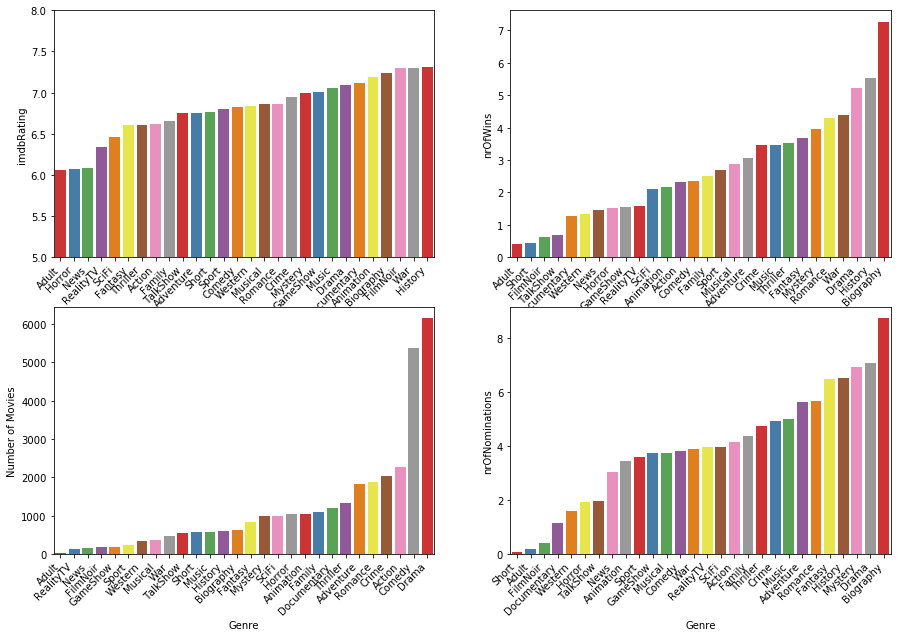

In [319]:
f, axes = plt.subplots(2, 2, figsize=(15,10))

genres_rating_plot = sns.barplot(x='Genre',y='imdbRating',data=genres_data.sort_values('imdbRating'), palette='Set1',ax=axes[0][0])
genres_rating_plot.set_xticklabels(genres_rating_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
genres_rating_plot.set(ylim=(5, 8))

genres_nrOfWins_plot = sns.barplot(x='Genre',y='nrOfWins',data=genres_data.sort_values('nrOfWins'), palette='Set1', ax=axes[0][1])
genres_nrOfWins_plot.set_xticklabels(genres_nrOfWins_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

genres_title_plot = sns.barplot(x='Genre',y='title',data=genres_data.sort_values('title'), palette='Set1', ax=axes[1][0])
genres_title_plot.set_xticklabels(genres_title_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
genres_title_plot.set(xlabel='Genre', ylabel='Number of Movies')

genres_nrOfNominations_plot = sns.barplot(x='Genre',y='nrOfNominations',data=genres_data.sort_values('nrOfNominations'), palette='Set1', ax=axes[1][1])
genres_nrOfNominations_plot.set_xticklabels(genres_nrOfNominations_plot.get_xticklabels(), rotation=45, horizontalalignment='right')



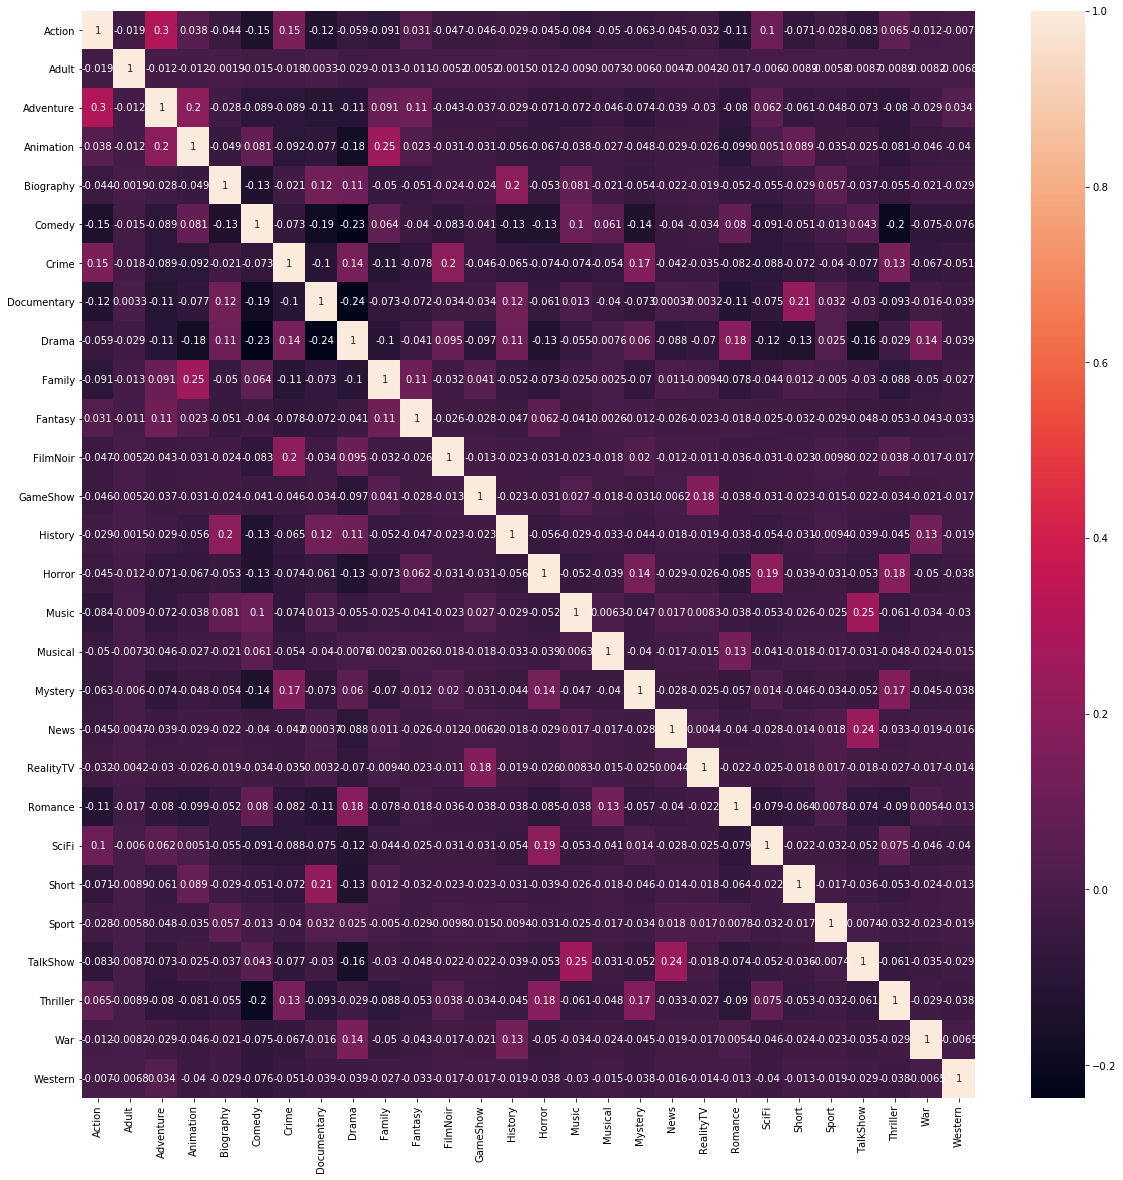

In [315]:
corrMatrix = imdb[['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)


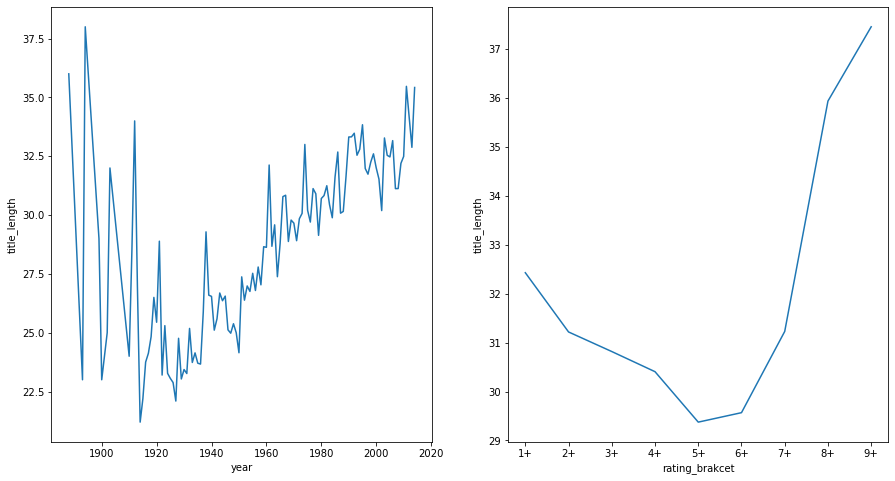

In [356]:
imdb['year'] = pd.to_numeric(imdb['year'], errors = 'coerce')
imdb['title_length'] = imdb['title'].str.len()
year_vs_tit_len = imdb.groupby('year').mean()['title_length']
imdb.dropna(inplace = True)
imdb['rating_brakcet'] = imdb['imdbRating'].astype(int)
rat_brack_vs_tit_len =  pd.DataFrame(imdb.groupby('rating_brakcet').mean()['title_length']).reset_index()
rat_brack_vs_tit_len['rating_brakcet'] = rat_brack_vs_tit_len['rating_brakcet'].astype(str) + "+"

year_vs_tit_len = pd.DataFrame(imdb.groupby('year')['title_length'].mean()).reset_index()

f, axes = plt.subplots(1, 2, figsize=(15,8))

sns.lineplot(x='year',y='title_length',data=year_vs_tit_len, palette='Set1', ax=axes[0])
sns.lineplot(x='rating_brakcet',y='title_length',data=rat_brack_vs_tit_len, palette='Set1', ax=axes[1])